In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
import sys
from specialist_group123 import Specialist
import numpy as np

def get_individual_gain_correlated(exp='run1', etr='1', ete='1'):
    sys.argv = ['notebook', 
                '--k',
                '-m', 'correlated', 
                '-etr', etr,
                '-ete', ete,
                '-exp', exp,
                '-tg', '200']

    individual_gain = np.array([Specialist().test(type="individual gain") for _ in range(5)])
    return individual_gain.mean()

def get_individual_gain_uncorrelated(exp='run1', etr='1', ete='1'):
    sys.argv = ['notebook', 
                '--k',
                '-m', 'uncorrelated', 
                '-etr', etr,
                '-ete', ete,
                '-exp', exp,
                '-ms', '265',
                '-tg', '200'
                ]

    individual_gain = np.array([Specialist().test(type="individual gain") for _ in range(5)])
    return individual_gain.mean()


total_runs = []
for enemy in ['1','4','7']:
    total_runs.append([get_individual_gain_correlated(exp=f'run{run}', etr=enemy, ete=enemy) for run in range(1, 11)])
total_runs_correlated = np.array(total_runs)

total_runs = []
for enemy in ['1','4','7']:
    total_runs.append([get_individual_gain_uncorrelated(exp=f'run{run}', etr=enemy, ete=enemy) for run in range(1, 11)])
total_runs_uncorrelated = np.array(total_runs)

pygame 2.6.0 (SDL 2.28.4, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: -20.0

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: -20.0

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: -20.0

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: -20.0

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: -20.0

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MESSAGE: Pygame initialized for simulation.
Fitness of the best individual against enemy 1: 100

MES

In [4]:
print(total_runs_correlated.shape)

(3, 10)


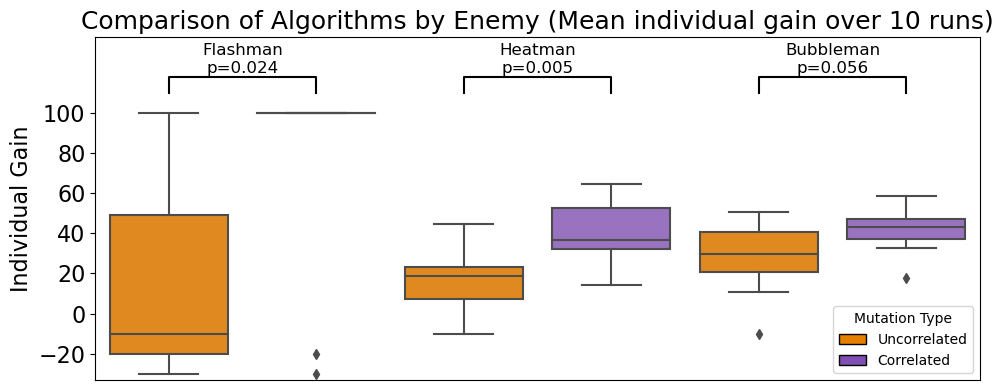

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches

np.random.seed(42)

algorithms = ['Uncorrelated', 'Correlated']
enemies = ['Flashman', 'Heatman', 'Bubbleman']

gain_values = np.random.normal(loc=0, scale=5, size=(10, 2, 3, 5)) *0.3

mean_values = np.mean(gain_values, axis=3)
mean_values[:, 0, :] = total_runs_uncorrelated.T
mean_values[:, 1, :] = total_runs_correlated.T

boxplot_data = []
labels = []
for enemy_idx, enemy in enumerate(enemies):
    for alg_idx, alg in enumerate(algorithms):
        boxplot_data.append(mean_values[:, alg_idx, enemy_idx])

plt.figure(figsize=(10, 4))
sns.set_palette(sns.color_palette(["#FF8C00", "#9966CC"]))
bplot = sns.boxplot(data=boxplot_data, palette=sns.color_palette(n_colors=2))


plt.xticks(ticks=np.arange(len(labels)), labels=labels,rotation=45, fontsize=14)
plt.yticks(fontsize=16, ticks=[-20, 0, 20, 40, 60, 80, 100])
plt.title('Comparison of Algorithms by Enemy (Mean individual gain over 10 runs)', fontsize=18)
plt.ylabel('Individual Gain', fontsize=16)

p_values = []
for enemy_idx, enemy in enumerate(enemies):
    for i in range(len(algorithms)):
        for j in range(i + 1, len(algorithms)):
            t_stat, p_value = ttest_ind(mean_values[:, i, enemy_idx], mean_values[:, j, enemy_idx])
            p_values.append((i, j, enemy_idx, p_value))

len_vertical = 8
names = ["Flashman", "Heatman", "Bubbleman"]
fixed_y = np.max(mean_values) + np.max(mean_values)*0.1
fixed_y_lower = np.min(mean_values) + np.min(mean_values)*0.1
for name_idx, (i, j, enemy_idx, p_value) in enumerate(p_values):
    x1 = i + enemy_idx * len(algorithms)
    x2 = j + enemy_idx * len(algorithms)
    plt.plot([x1, x1, x2, x2], [fixed_y, fixed_y + len_vertical, fixed_y + len_vertical, fixed_y], color='k')
    plt.text((x1 + x2) / 2, fixed_y + len_vertical*1.05, f'{names[name_idx]}\np={p_value:.3f}', ha='center', va='bottom', fontsize=12)

plt.ylim(fixed_y_lower, fixed_y+ fixed_y*0.25)
plt.tight_layout()
correlated_patch = mpatches.Patch(edgecolor="black", facecolor="#E67E00", label='Uncorrelated')
uncorrelated_patch = mpatches.Patch(edgecolor="black", facecolor="#7F4FB3", label='Correlated')
plt.legend(title='Mutation Type', handles=[correlated_patch, uncorrelated_patch], loc='lower right', frameon=True)
plt.show()


In [6]:

def plot_2(generations, enemy_names, bests, means, bests_std, means_std, Title="asd"):
    fig, axs = plt.subplots(1, 3, figsize=(30, 6), sharey=True)
    small_font = 30
    big_font = 35
    
    for enemy_idx, ax in zip(range(3), axs):
        
        # Plot mean fitness
        ax.plot(generations, means[enemy_idx, :], label='Mean Fitness', color="#7F4FB3")
        ax.fill_between(generations,
                        means[enemy_idx, :] - means_std[enemy_idx, :],
                        means[enemy_idx, :] + means_std[enemy_idx, :],
                        alpha=0.2, color="#7F4FB3")

        # Plot best fitness
        ax.plot(generations, bests[enemy_idx, :], label='Best Fitness', color="#E67E00")
        ax.fill_between(generations,
                        bests[enemy_idx, :] - bests_std[enemy_idx, :],
                        bests[enemy_idx, :] + bests_std[enemy_idx, :],
                        alpha=0.2, color="#E67E00")

        ax.set_title(f'Fitness Comparison for {enemy_names[enemy_idx]}', fontsize=big_font)
        ax.set_xlabel('Generations', fontsize=small_font)
        if enemy_idx == 0:
            ax.set_ylabel('Fitness', fontsize=small_font)
        ax.tick_params(axis='both', labelsize=small_font)
        if enemy_idx == 1:
            ax.legend(fontsize=small_font)
        ax.grid()
        fig.suptitle(Title, fontsize=big_font+4, y=0.99)  
    plt.tight_layout()
    plt.show()

(3, 10, 200, 3)


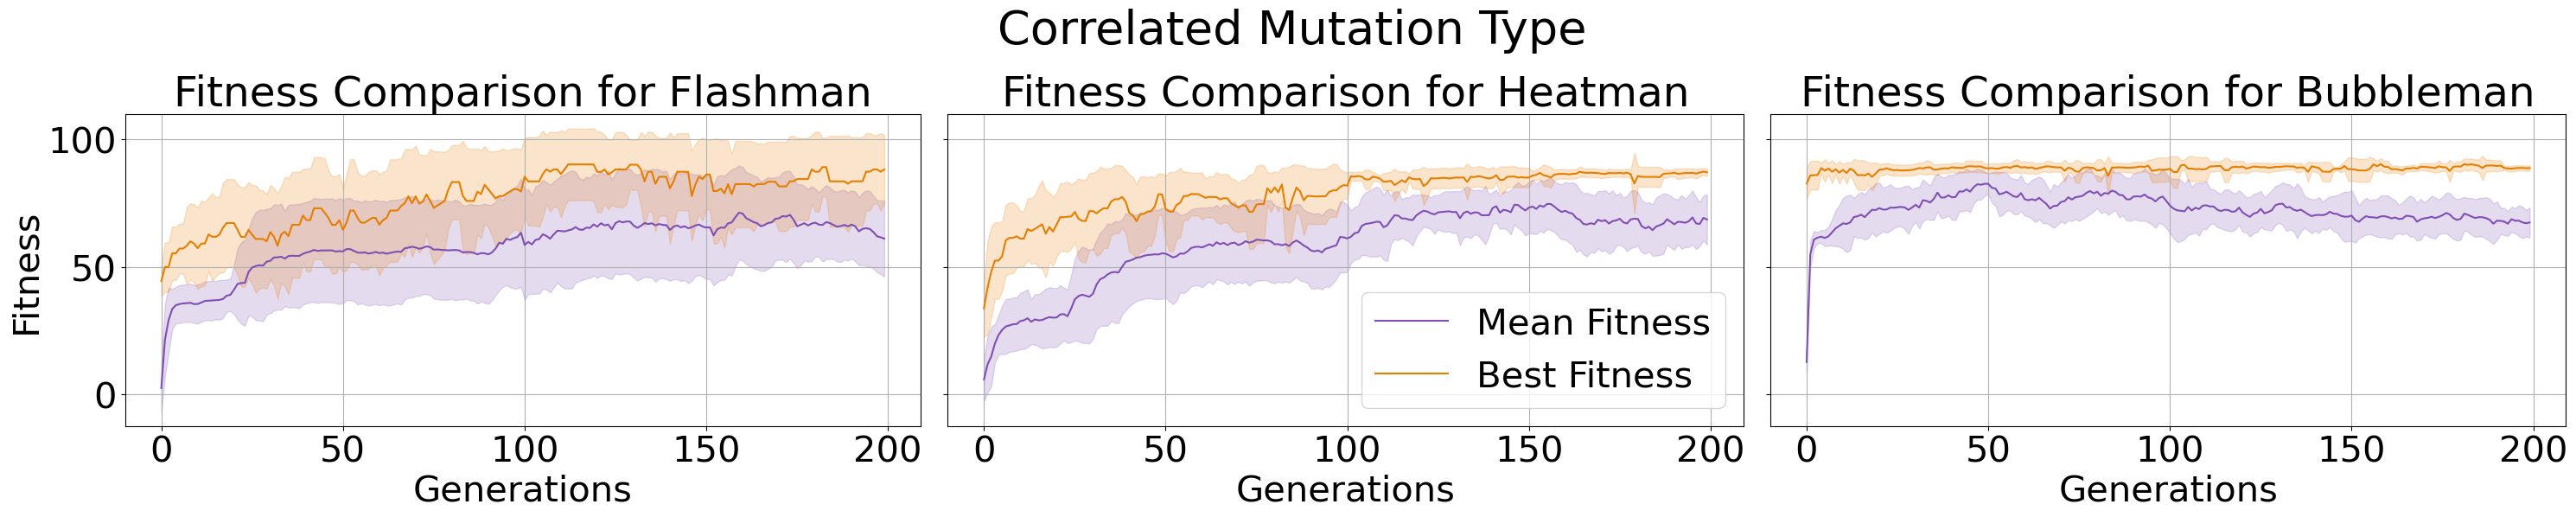

In [7]:
# CORRELATED
import numpy as np
def get_results_run(experiment_name):
    data = []
    with open(f'./{experiment_name}/results.txt', 'r') as f:
        for line in f:
            data.append(line.strip().split()[2:6])
    if len(data) != 100:
        print(experiment_name)
        print(len(data))
    return data

total_results = []
for enemy in [1,4,7]:
    results = [get_results_run(f"experiments/run{i}_popusize=100_enemy={enemy}_gens=100_hiddensize=10_u=1_l=-1_mutationtype=correlated_mutationprobability=0.5_csigma=0.3_cc=0.2_c1=0.1_cmu=0.1_dsigma=0.5_sigma=0.5_init=kaiming")
            for i in range(1, 11)]
    results2 = [get_results_run(f"experiments/run{i}_popusize=100_enemy={enemy}_gens=200_hiddensize=10_u=1_l=-1_mutationtype=correlated_mutationprobability=0.5_csigma=0.3_cc=0.2_c1=0.1_cmu=0.1_dsigma=0.5_sigma=0.5_init=kaiming")
            for i in range(1, 11)]
    combined_results = list(np.concatenate((np.array(results), np.array(results2)), axis=1))
    total_results.append(combined_results)
total_results = np.array(total_results, dtype=float)
print(total_results.shape)
mean_total_results = np.mean(total_results, axis=1)

bests = mean_total_results[:, :, 0]
bests_std = np.std(total_results[:, :, :, 0], axis=1)

means = mean_total_results[:, :, 1]
means_std = np.std(total_results[:, :, :, 1], axis=1)

stds = mean_total_results[:, :, 2]
stds_std = np.std(total_results[:, :, :, 2], axis=1)

generations = np.arange(total_results.shape[2])
plot_2(generations, ["Flashman", "Heatman", "Bubbleman"], bests, means, bests_std, means_std, Title="Correlated Mutation Type")

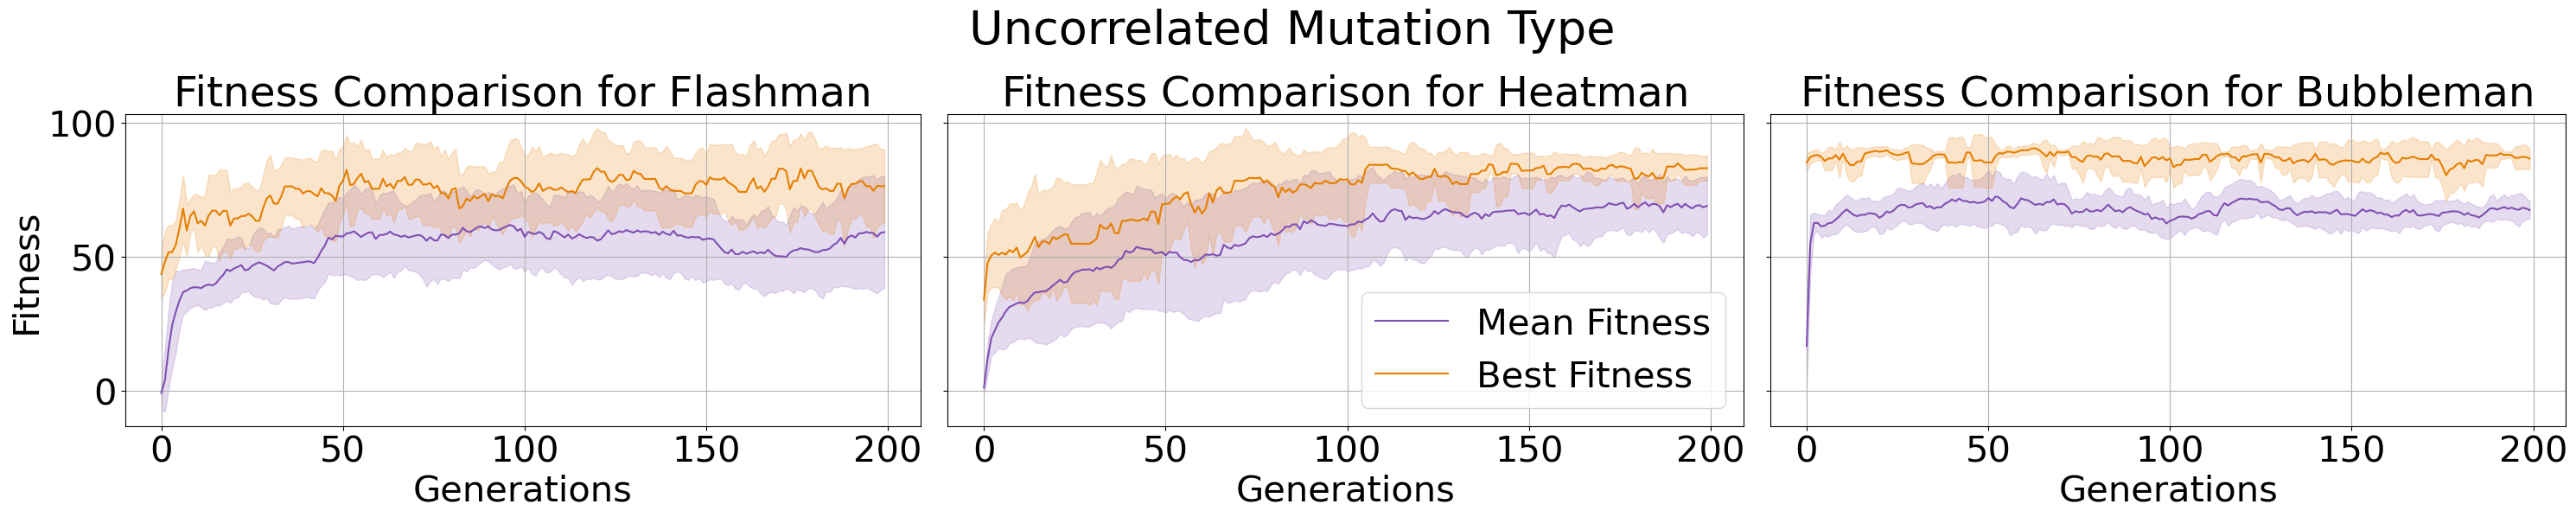

In [8]:
# UNCORRELATED
def get_results_run(experiment_name):
    data = []
    with open(f'./{experiment_name}/results.txt', 'r') as f:
        for line in f:
            data.append(line.strip().split()[2:6])
    if len(data) != 100:
        print(experiment_name)
        print(len(data))
    return data

total_results = []
for enemy in [1,4,7]:
    results = [get_results_run(f"experiments/run{i}_popusize=100_enemy={enemy}_gens=100_hiddensize=10_u=1_l=-1_mutationtype=uncorrelated_mutationprobability=0.5_mutationstepsize=265_mutationthreshold=0.001_sinit=0.5_init=kaiming")
            for i in range(1, 11)]
    results2 = [get_results_run(f"experiments/run{i}_popusize=100_enemy={enemy}_gens=200_hiddensize=10_u=1_l=-1_mutationtype=uncorrelated_mutationprobability=0.5_mutationstepsize=265_mutationthreshold=0.001_sinit=0.5_init=kaiming")
            for i in range(1, 11)]
    combined_results = list(np.concatenate((np.array(results), np.array(results2)), axis=1))
    total_results.append(combined_results)
total_results = np.array(total_results, dtype=float)
mean_total_results = np.mean(total_results, axis=1)

bests2 = mean_total_results[:, :, 0]
bests_std2 = np.std(total_results[:, :, :, 0], axis=1)

means2 = mean_total_results[:, :, 1]
means_std2 = np.std(total_results[:, :, :, 1], axis=1)

stds2 = mean_total_results[:, :, 2]
stds_std2 = np.std(total_results[:, :, :, 2], axis=1)

generations = np.arange(total_results.shape[2])
plot_2(generations,["Flashman", "Heatman", "Bubbleman"], bests2, means2, bests_std2, means_std2,  Title="Uncorrelated Mutation Type")

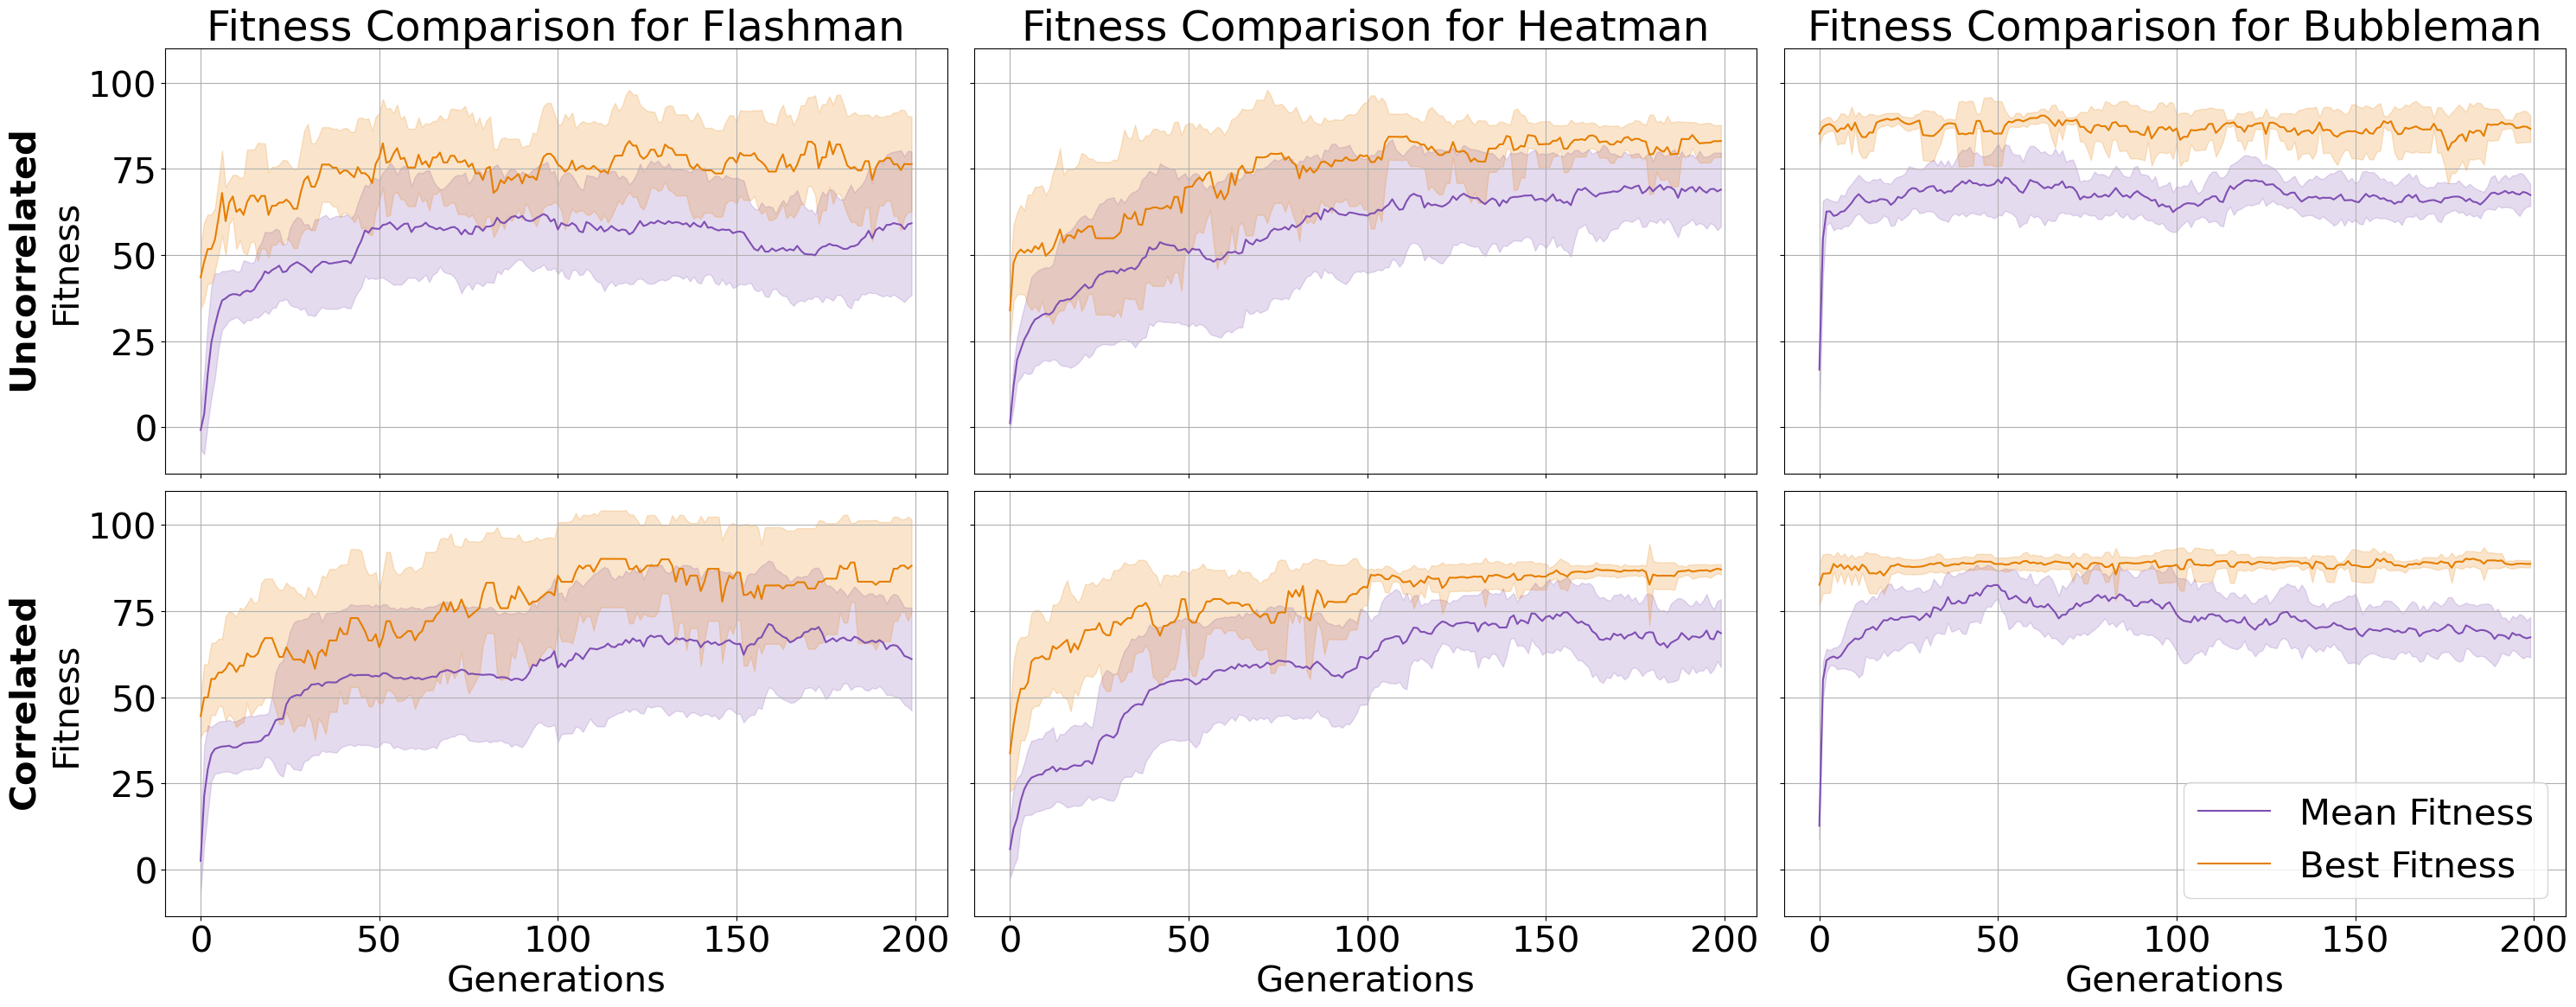

In [9]:
def plot_3(generations, enemy_names_1, bests_1, means_1, bests_std_1, means_std_1, 
           bests_2, means_2, bests_std_2, means_std_2, Title_1="First Set", Title_2="Second Set"):
    fig, axs = plt.subplots(2, 3, figsize=(30, 12), sharey=True)
    small_font = 30
    big_font = 35
    
    for enemy_idx, ax in zip(range(3), axs[0]):
        
        # Plot mean fitness
        ax.plot(generations, means_2[enemy_idx, :], label='Mean Fitness', color="#7F4FB3")
        ax.fill_between(generations,
                        means_2[enemy_idx, :] - means_std_2[enemy_idx, :],
                        means_2[enemy_idx, :] + means_std_2[enemy_idx, :],
                        alpha=0.2, color="#7F4FB3")

        # Plot best fitness
        ax.plot(generations, bests_2[enemy_idx, :], label='Best Fitness', color="#E67E00")
        ax.fill_between(generations,
                        bests_2[enemy_idx, :] - bests_std_2[enemy_idx, :],
                        bests_2[enemy_idx, :] + bests_std_2[enemy_idx, :],
                        alpha=0.2, color="#E67E00")
        
        ax.set_title(f'Fitness Comparison for {enemy_names_1[enemy_idx]}', fontsize=big_font)
        ax.set_xticklabels([])

        if enemy_idx == 0:
            ax.set_ylabel(r'$\bf{Uncorrelated}$' + '\nFitness', fontsize=small_font)
        ax.tick_params(axis='both', labelsize=small_font)
        ax.grid()
    
    for enemy_idx, ax in zip(range(3), axs[1]):
        
        ax.plot(generations, means_1[enemy_idx, :], label='Mean Fitness', color="#7F4FB3")
        ax.fill_between(generations,
                        means_1[enemy_idx, :] - means_std_1[enemy_idx, :],
                        means_1[enemy_idx, :] + means_std_1[enemy_idx, :],
                        alpha=0.2, color="#7F4FB3")

        # Plot best fitness
        ax.plot(generations, bests_1[enemy_idx, :], label='Best Fitness', color="#E67E00")
        ax.fill_between(generations,
                        bests_1[enemy_idx, :] - bests_std_1[enemy_idx, :],
                        bests_1[enemy_idx, :] + bests_std_1[enemy_idx, :],
                        alpha=0.2, color="#E67E00")

        if enemy_idx == 0:
            ax.set_ylabel(r'$\bf{Correlated}$' + '\nFitness', fontsize=small_font)
        ax.tick_params(axis='both', labelsize=small_font)
        if enemy_idx == 2:
            ax.legend(fontsize=small_font)
        ax.grid()
        ax.set_xlabel('Generations', fontsize=small_font)

    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit suptitle
    plt.show()

plot_3(generations, ["Flashman", "Heatman", "Bubbleman"], bests, means, bests_std, means_std,  bests2, means2, bests_std2, means_std2, Title_1="First Set", Title_2="Second Set")

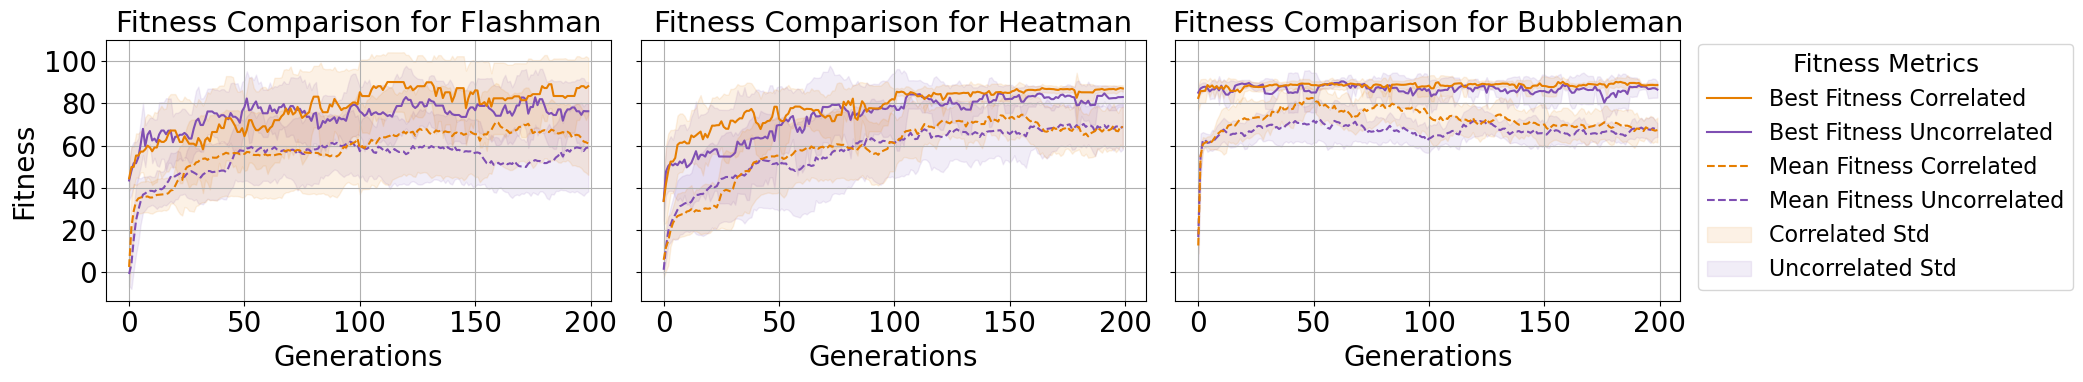

In [10]:
import matplotlib.pyplot as plt

def plot_4(generations, enemy_names_1, bests_1, means_1, bests_std_1, means_std_1, 
           bests_2, means_2, bests_std_2, means_std_2, Title_1="First Set", Title_2="Second Set"):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
    small_font = 20
    big_font = 21
    
    for enemy_idx in range(3):
        ax = axs[enemy_idx]
        
        # Plot mean fitness for the second set
        ax.plot(generations, means_2[enemy_idx, :], label='Mean Fitness Uncorrelated', color="#7F4FB3", linestyle='--')
        ax.fill_between(generations,
                        means_2[enemy_idx, :] - means_std_2[enemy_idx, :],
                        means_2[enemy_idx, :] + means_std_2[enemy_idx, :],
                        alpha=0.1, color="#7F4FB3", label="Uncorrelated Std")

        # Plot best fitness for the second set
        ax.plot(generations, bests_2[enemy_idx, :], label='Best Fitness Uncorrelated', color="#7F4FB3")
        ax.fill_between(generations,
                        bests_2[enemy_idx, :] - bests_std_2[enemy_idx, :],
                        bests_2[enemy_idx, :] + bests_std_2[enemy_idx, :],
                        alpha=0.1, color="#7F4FB3")
        
        # Plot mean fitness for the first set
        ax.plot(generations, means_1[enemy_idx, :], label='Mean Fitness Correlated', color="#E67E00", linestyle='--')
        ax.fill_between(generations,
                        means_1[enemy_idx, :] - means_std_1[enemy_idx, :],
                        means_1[enemy_idx, :] + means_std_1[enemy_idx, :],
                        alpha=0.1, color="#E67E00", label="Correlated Std")

        # Plot best fitness for the first set
        ax.plot(generations, bests_1[enemy_idx, :], label='Best Fitness Correlated', color="#E67E00")
        ax.fill_between(generations,
                        bests_1[enemy_idx, :] - bests_std_1[enemy_idx, :],
                        bests_1[enemy_idx, :] + bests_std_1[enemy_idx, :],
                        alpha=0.1, color="#E67E00")
        
        # Set title for each subplot
        ax.set_title(f'Fitness Comparison for {enemy_names_1[enemy_idx]}', fontsize=big_font)

        # Set labels for the first and last plots
        if enemy_idx == 0:
            ax.set_ylabel('Fitness', fontsize=small_font)
            
        # Set common properties
        ax.set_xlabel('Generations', fontsize=small_font)
        ax.tick_params(axis='both', labelsize=small_font)
        ax.set_yticks([0, 20, 40, 60, 80, 100])
        ax.grid()
    
    handles, labels = axs[2].get_legend_handles_labels()

    order = [5, 2, 3, 0, 4, 1]

    fig.legend([handles[idx] for idx in order], 
            [labels[idx] for idx in order], 
            loc='center left', bbox_to_anchor=(0.94, 0.55), 
            fontsize=small_font-4, title='Fitness Metrics', 
            title_fontsize=small_font-2)
    
    plt.tight_layout(rect=[0, 0, 0.95, 0.98])  
    plt.show()

# Example call
plot_4(generations, ["Flashman", "Heatman", "Bubbleman"], bests, means, bests_std, means_std,  
       bests2, means2, bests_std2, means_std2, Title_1="First Set", Title_2="Second Set")


In [11]:
def plot_1(generations, enemy_idx, bests, means, stds, bests_std, means_std, stds_std):
    

# Plot for each enemy
    plt.figure(figsize=(30, 6))
    # Plot mean fitness
    plt.plot(generations, bests[enemy_idx, :], label='Best Fitness')
    plt.fill_between(generations,
                    bests[enemy_idx, :] - bests_std[enemy_idx, :],
                    bests[enemy_idx, :] + bests_std[enemy_idx, :],
                    alpha=0.2)

    # Plot max fitness
    plt.plot(generations, means[enemy_idx, :], label='Mean Fitness')
    plt.fill_between(generations,
                    means[enemy_idx, :] - means_std[enemy_idx, :],
                    means[enemy_idx, :] + means_std[enemy_idx, :],
                    alpha=0.2)

    plt.title(f'Fitness Comparison for {enemies[enemy_idx]}', fontsize=18)
    plt.xlabel('Generations', fontsize=16)
    plt.ylabel('Fitness', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=18)
    plt.grid()
    plt.tight_layout()
    plt.show()

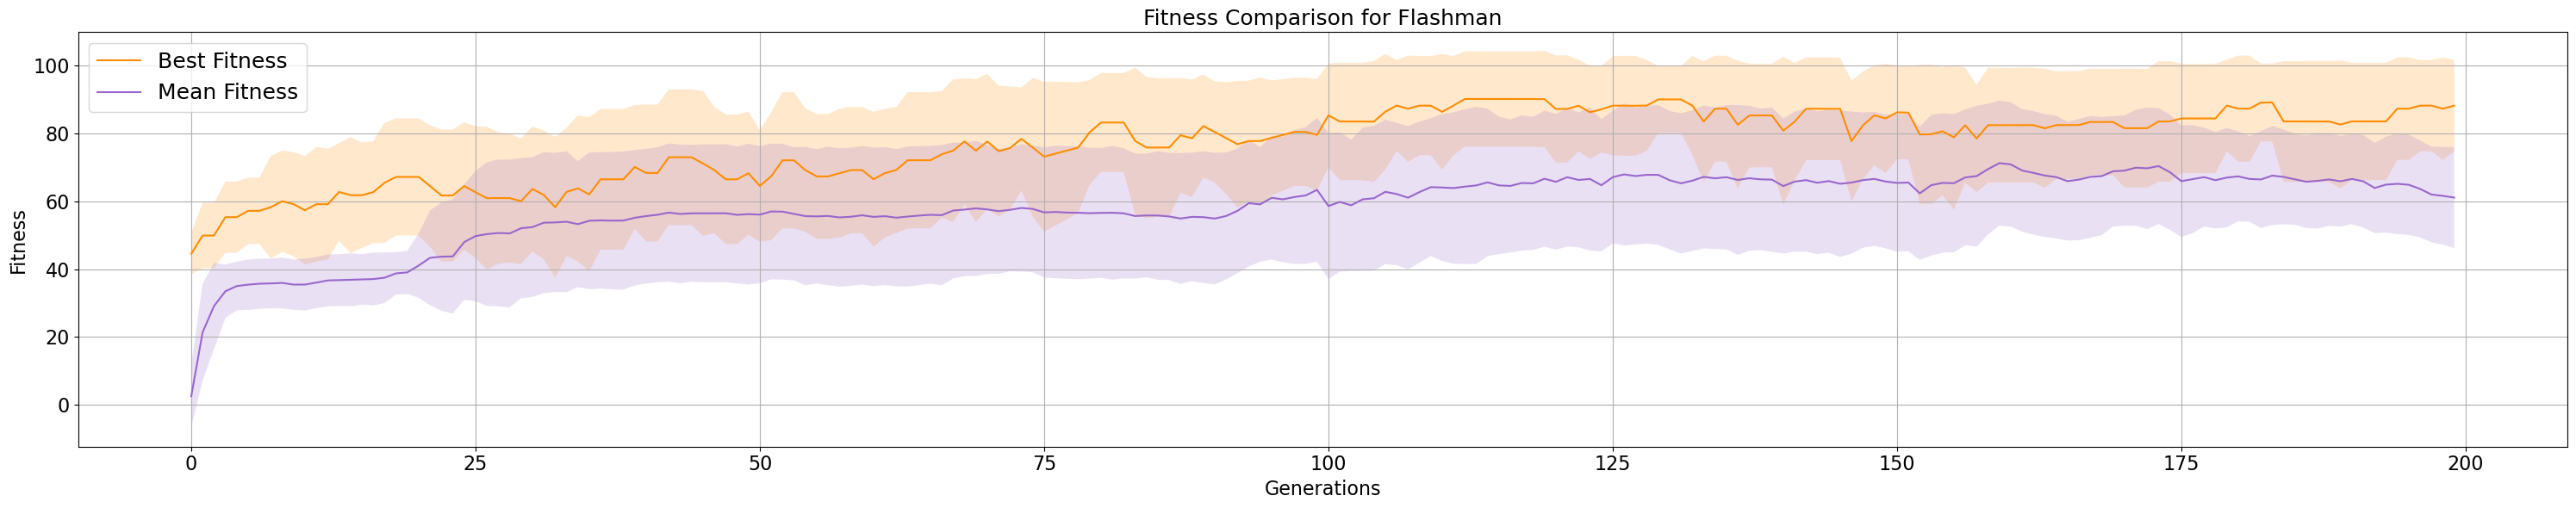

In [12]:
generations = np.arange(total_results.shape[2])
plot_1(generations, 0, bests, means, stds, bests_std, means_std, stds_std)

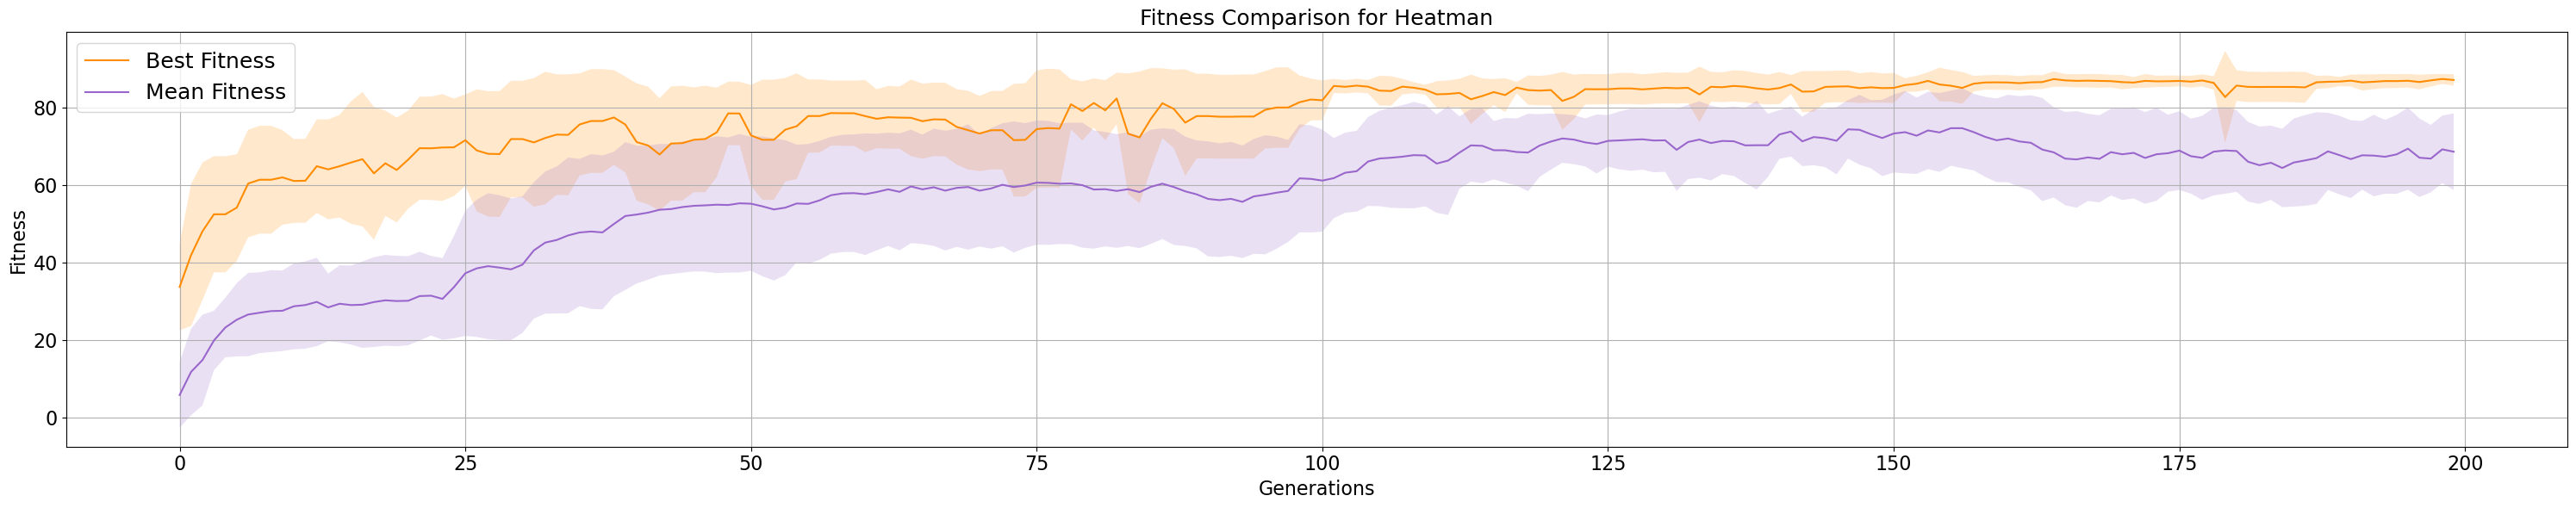

In [13]:
plot_1(generations, 1, bests, means, stds, bests_std, means_std, stds_std)

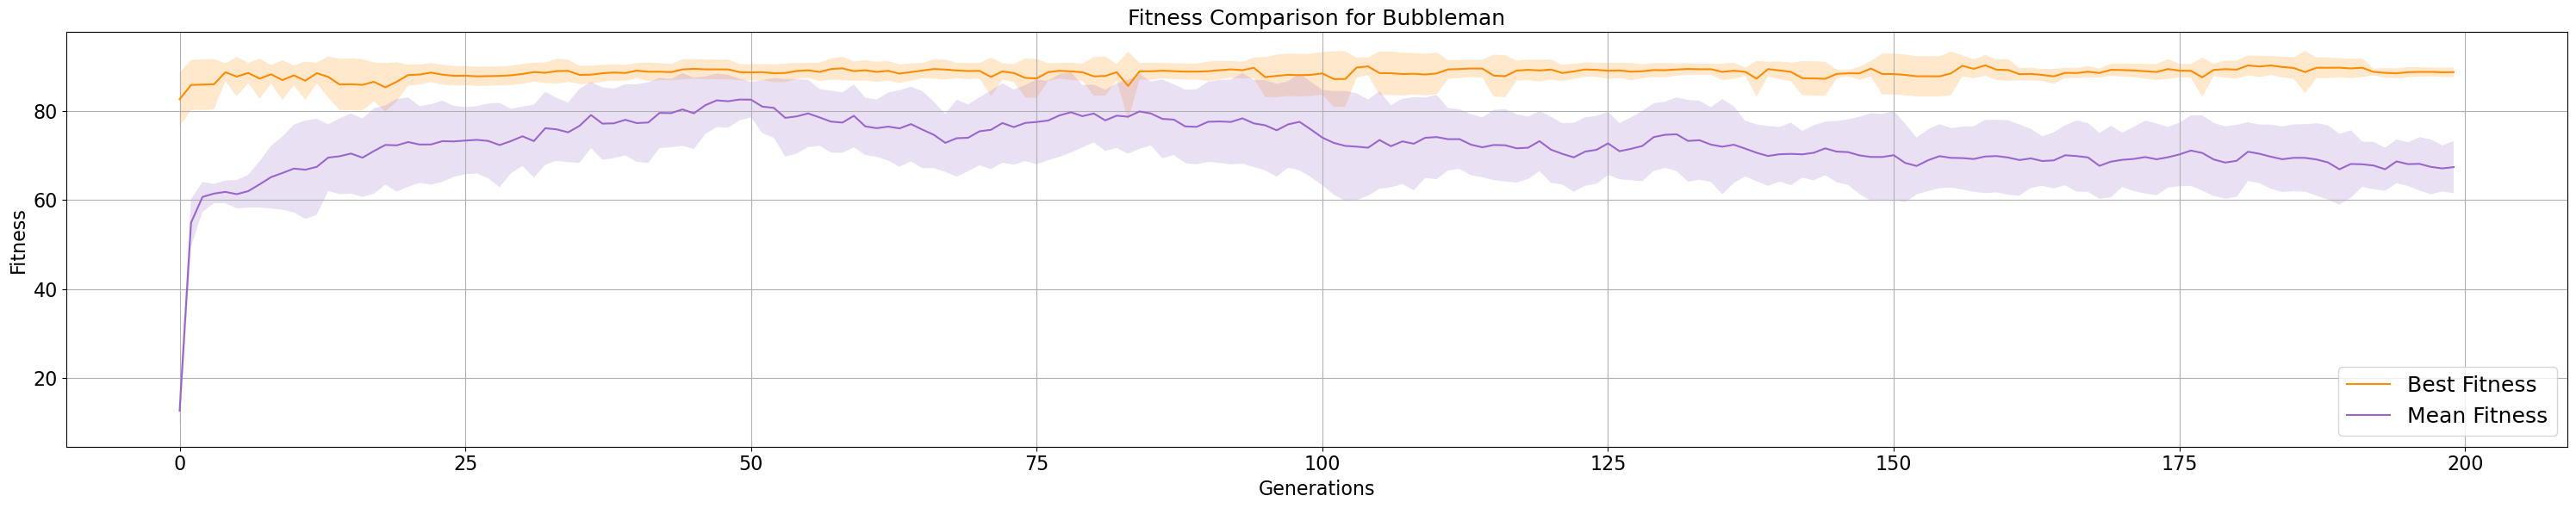

: 

In [14]:
plot_1(generations, 2, bests, means, stds, bests_std, means_std, stds_std)